<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/135_density_func.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(density-function-notebook)=
# La funzione di densità di probabilità 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In precedenza abbiamo trattato solo variabili casuali discrete, ossia variabili che assumono solo valori interi. Tuttavia, se vogliamo rappresentare grandezze come lunghezze, volumi, distanze o qualsiasi altra proprietà continua del mondo fisico o psicologico, è necessario generalizzare l'approccio utilizzato finora.

Le variabili casuali continue assumono valori reali, e l'insieme dei numeri reali è non numerabile in quanto è più grande dell'insieme degli interi.[^020_density_func-1] Le leggi della probabilità valgono sia per le variabili casuali discrete che per quelle continue. Tuttavia, la nozione di funzione di massa di probabilità deve essere sostituita dal suo equivalente continuo, la *funzione di densità di probabilità*. In questo capitolo, il nostro obiettivo è chiarire il significato di questa nozione.

[^020_density_func-1]: Georg Cantor dimostrò che era impossibile mappare uno a uno i reali negli interi, dimostrando così che l'insieme dei reali è non numerabile.

## Spinner e variabili casuali continue uniformi

Consideriamo l'esperimento casuale in cui facciamo ruotare ad alta velocità uno spinner simmetrico imperniato su un goniometro e osserviamo la posizione in cui si ferma, identificata dall'angolo acuto con segno tra il suo asse e l'asse orizzontale del goniometro. Denotiamo con $\Theta$ la variabile casuale corrispondente alla "pendenza dello spinner". In questo contesto, l'assunzione che lo spinner sia simmetrico implica che, in ogni prova, la rotazione produce un angolo qualunque da 0 a 360 gradi con la stessa probabilità. In altre parole, un valore $\Theta$ compreso tra 0 e 36 gradi ha la stessa probabilità di essere osservato di un valore $\Theta$ compreso tra 200 e 236 gradi. Inoltre, dal momento che 36 gradi corrisponde a un decimo del percorso intorno al cerchio, la probabilità di ottenere un qualsiasi intervallo di 36 gradi sarà sempre uguale al 10%. Più precisamente, si ha $P(0 \leq \Theta \leq 36) = \frac{1}{10}$ e $P(200 \leq \Theta \leq 236) = \frac{1}{10}$.

È importante sottolineare che le probabilità sopra menzionate non si riferiscono al fatto che la variabile casuale $\Theta$ assuma un valore specifico, ma piuttosto all'evento di osservare $\Theta$ in un intervallo di valori. In generale, la probabilità che la pendenza $\Theta$ cada in un intervallo specificato è data dalla frazione del cerchio rappresentata dall'intervallo, cioè $P(\theta_1 \leq \Theta \leq \theta_2) = \frac{\theta_2 - \theta_1}{360}$, per ogni intervallo $[\theta_1, \theta_2]$ tale che $0 \leq \theta_1 \leq \theta_2 \leq 360$.

Nel caso di una variabile casuale continua, come l'angolo dello spinner, dunque, è facile capire come assegnare una probabilità all'evento in cui la variabile casuale assuma un valore compreso in un intervallo.

### Distribuzione uniforme

L'esempio dello spinner rappresenta il "meccanismo generatore dei dati" della variabile casuale continua più semplice, ovvero la distribuzione continua uniforme. In teoria della probabilità, la distribuzione continua uniforme è una distribuzione di probabilità continua che assegna la stessa probabilità a tutti i punti appartenenti ad un intervallo [a, b] contenuto in un certo insieme.

La distribuzione uniforme continua definita sull'intervallo ${\displaystyle S=[a,b]\subset \mathbb {R}}$ viene denotata con ${\displaystyle {\mathcal {U}}(a,b)={\mathcal {U}}([a,b])}$. La sua densità di probabilità è

$$
f(x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$

e 0 altrimenti. La distribuzione uniforme continua è caratterizzata dalla sua proprietà di equidistribuzione: tutti gli intervalli di pari lunghezza all'interno dell'intervallo [a, b] hanno la stessa probabilità. In altre parole, se ${\displaystyle [c,d]}$ è un sottointervallo di ${\displaystyle [a,b]}$, allora la probabilità che una variabile casuale continua con distribuzione uniforme in ${\displaystyle [a,b]}$ cada in ${\displaystyle [c,d]}$ è ${\displaystyle (d-c)/(b-a)}$.

Svolgiamo un esercizio con Python in cui, per continuare il nostro esempio dello spinner, consideriamo una $\mathcal {U}(0, 360)$.

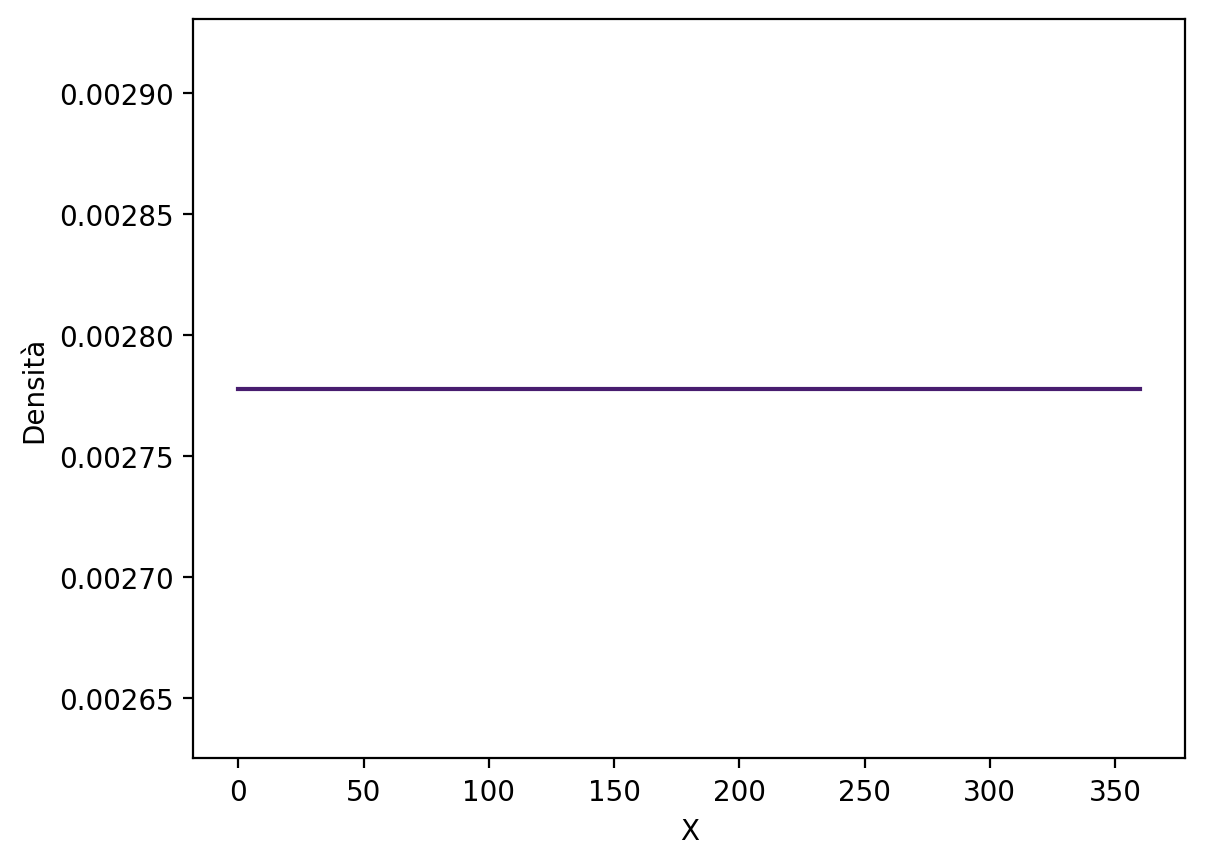

In [3]:
a = 0
b = 360
size = 101
x = np.linspace(a, b, size)
y = st.uniform.pdf(x, loc=a, scale=b)

plt.figure()
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Densità");

Generiamo 100,000 valori casuali di una v.c. $\Theta \sim \mathcal {U}(0, 360)$.

In [4]:
data = rng.uniform(0, 360, size=100000)

L'istogramma delle 100,000 realizzazioni di $\Theta$ è il seguente.

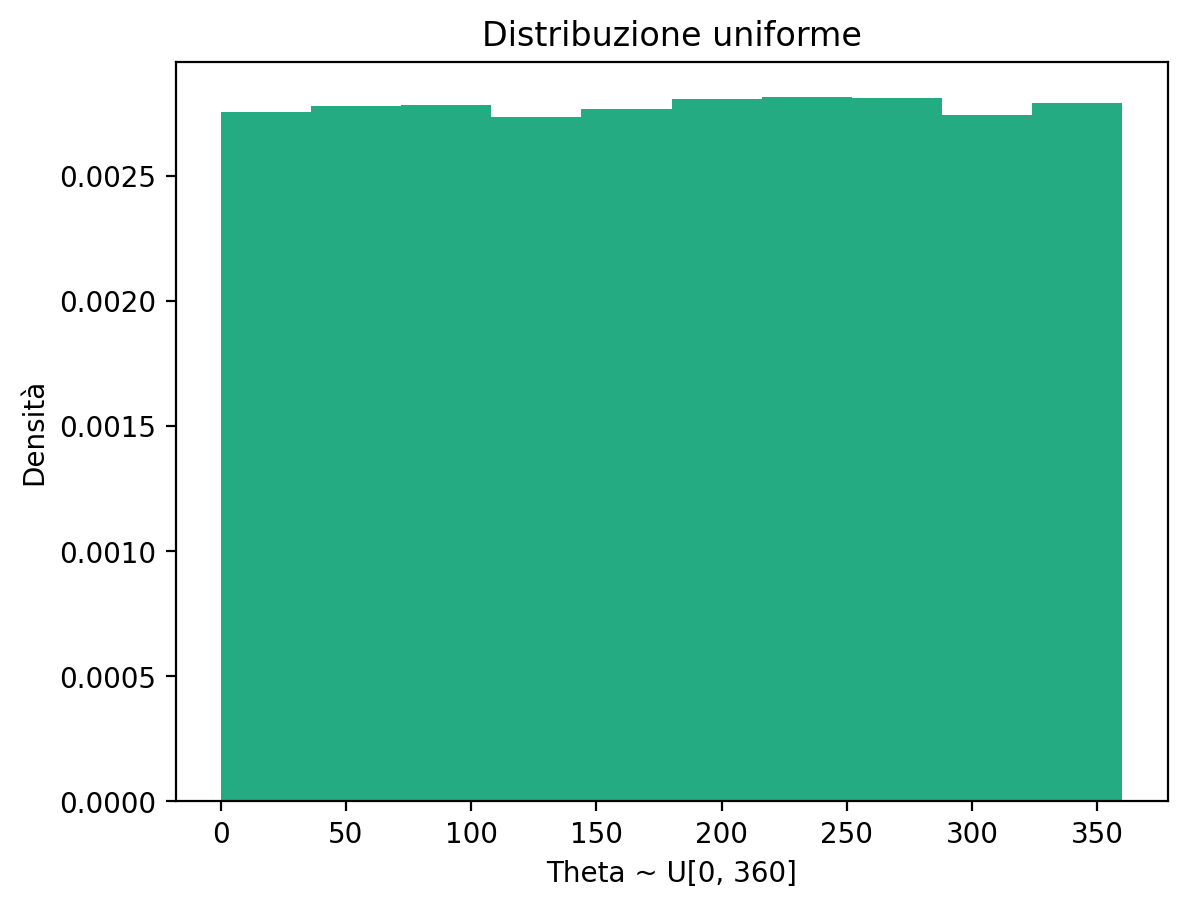

In [5]:
plt.figure()
plt.hist(data, color="C2", density=True)
plt.xlabel("Theta ~ U[0, 360]")
plt.ylabel("Densità")
plt.title("Distribuzione uniforme")
plt.show()

È chiaro che, all'aumentare del numero delle realizzazioni $\Theta$, il profilo dell'istogramma tenderà a diventare una linea retta. Ciò significa che la funzione di densità di una variabile casuale uniforme continua è una costante: $f(\Theta) = c$.

Dalla figura precedente vediamo che l'area sottesa alla funzione di densità è $(b - a)\cdot c$. Dato che tale area deve essere unitaria, ovvero, $(b - a) \cdot c = 1$, possiamo trovare $c$ dividendo entrambi i termini per $b - a$,

$$
c  = \frac{\displaystyle{1}}{\displaystyle b - a}.
$$

Ovvero, se $\Theta \sim \mathcal{U}(a, b)$, allora

$$
p_{\Theta}(\theta) = \mathcal{U}(\theta \mid a, b),
$$

laddove

$$
\mathcal{U}(\theta \mid a, b) = \frac{1}{b - a}.
$$

In conclusione, la densità di una variabile casuale uniforme continua non dipende da $\theta$ -- è costante e identica per ogni possibile valore $\theta$.

Il valore atteso di $X \sim \mathcal {U}(a,b)$ è dato da

$$
\mathbb{E} = \frac{b - a}{2}.
$$

Nel caso della presente simulazione otteniamo

In [48]:
data.mean()

180.44171561785456

Svolgiamo un altro semplice esercizio. Consideriamo una variabile casuale uniforme $X$ definita sull'intervallo \[0, 100\]. Poniamoci il problema di trovare la probabilità $P(20 < X < 60)$.

Per trovare la soluzione è sufficiente calcolare l'area di un rettangolo di base $60 - 20 = 40$ e di altezza 1/100. La probabilità cercata è dunque $P(20 < X < 60) = 40 \cdot 0.01 = 0.4$.

## Il paradosso delle variabili casuali continue

Consideriamo ora la probabilità che la variabile casuale continua assuma un valore specifico, come ad esempio una pendenza dello spinner esattamente uguale a 36 gradi. Sorprendentemente, la risposta è zero:

$$
P(\Theta = 36) = 0.
$$

Ciò è dovuto al fatto che se la probabilità di un valore specifico fosse maggiore di zero, allora ogni altro possibile valore dovrebbe avere la stessa probabilità, poiché abbiamo assunto che tutti i valori $\Theta$ sono egualmente probabili. Ma se sommiamo tutte queste probabilità, il totale sarebbe maggiore di uno, il che è impossibile.

Nel caso delle variabili casuali continue, dobbiamo quindi rinunciare all'idea che ogni singolo valore della variabile casuale possa avere una massa di probabilità maggiore di zero. Invece, una massa di probabilità viene assegnata alla realizzazione della variabile casuale in un intervallo di valori. Questo è ciò che differenzia le variabili casuali continue dalle variabili casuali discrete, dove ogni singolo valore ha una probabilità di massa non nulla. In sintesi, le variabili casuali continue non hanno una massa di probabilità, ma una densità di probabilità.

## Dagli istogrammi alle densità

Le considerazioni precedenti ci fanno comprendere che, a differenza delle variabili casuali discrete, non esiste l'equivalente di una funzione di massa di probabilità per le variabili casuali continue. Invece, esiste una funzione di densità di probabilità che può essere definita in termini di una simulazione. Considerando un numero enorme di casi e facendo tendere l'ampiezza $\Delta$ di ciascuna classe a 0, il profilo dell'istogramma delle frequenze delle classi di ampiezza $\Delta$ tende a diventare una curva continua. Tale curva continua $f(x)$ è detta funzione di densità di probabilità.

In un istogramma, l'area di ogni barra è proporzionale alla frequenza relativa delle osservazioni nell'intervallo considerato. Dato che tutti gli intervalli hanno la stessa ampiezza, l'altezza di ogni barra sarà proporzionale alla frequenza relativa delle osservazioni nell'intervallo. Nella simulazione, possiamo pensare all'area di ciascuna barra dell'istogramma come alla stima della probabilità che la variabile casuale assuma un valore nell'intervallo considerato. Con l'aumentare del numero di osservazioni $M$, le probabilità stimate si avvicinano sempre di più ai valori effettivi della probabilità. Inoltre, all'aumentare del numero degli intervalli (quando l'ampiezza $\Delta$ dell'intervallo tende a 0), il profilo dell'istogramma tende a diventare una curva continua. Tale curva continua è appunto la funzione di densità di probabilità della variabile casuale.

In precedenza, nella statistica descrittiva, abbiamo già incontrato una rappresentazione che ha lo stesso significato della funzione di densità, ovvero il kernel density plot. La stima della densità del kernel (KDE), infatti, è un metodo non parametrico utilizzato per stimare la funzione di densità di probabilità di una variabile casuale.

Per fare un esempio, generiamo 50 valori dalla distribuzione del quoziente di intelligenza. Stampiamo i primi 5 valori.

In [6]:
mu, sigma = 100, 15
size = 50
x = rng.normal(loc=mu, scale=sigma, size=size)
x[:5]

array([115.96881748,  80.41486199, 108.36740969, 100.14194297,
       135.52580645])

Creiamo ora un istogramma a cui sovrapponiamo la funzione di densità Normale con parametri corrispondenti alla media e deviazione standard del campione. Con poche osservazioni, non c'è una buona corrispondenza tra l'istogramma e la curva continua che abbiamo chiamato "funzione di densità".

Text(0.5, 1.0, 'Media e deviazione standard: 101.36 e 13.89')

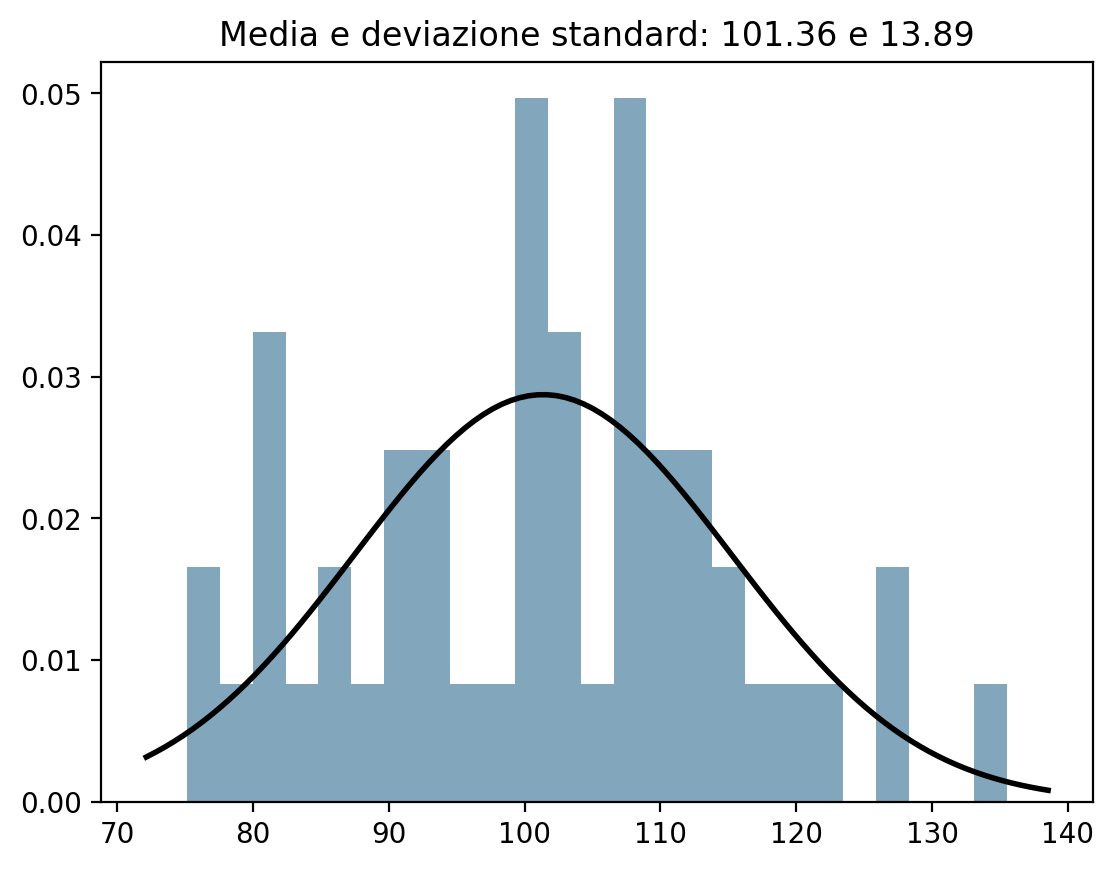

In [7]:
mu, std = st.norm.fit(x)
plt.figure()
plt.hist(x, bins=25, density=True, alpha=0.6, color="C1")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
plt.plot(x, p, "k", linewidth=2)
title = "Media e deviazione standard: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)

Ora aumentiamo il numero di osservazioni. In questo caso consideriamo 20,000 valori del QI. Generiamo dunque una figura simile alla precedente, solo considerando un campione di dati più grande.

Text(0.5, 1.0, 'Media e deviazione standard: 101.18 e 15.04')

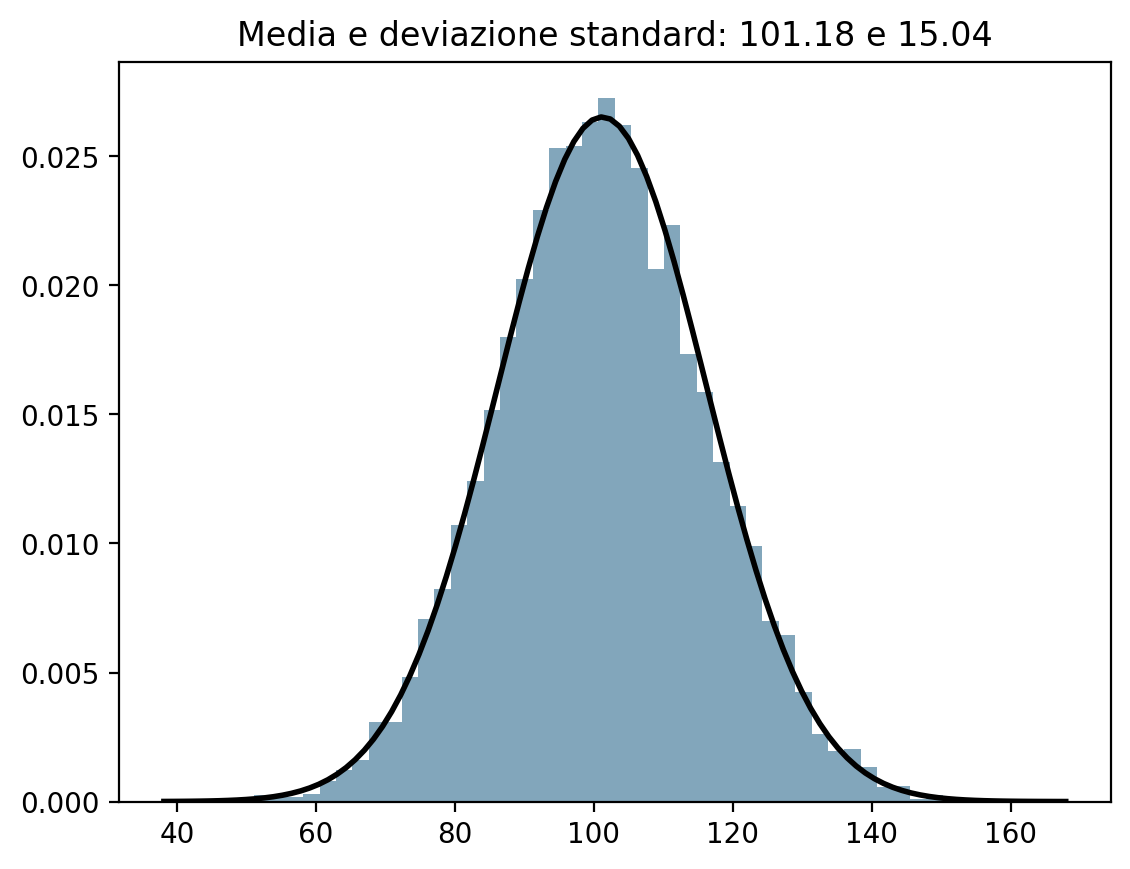

In [8]:
size = 10000
x = rng.normal(loc=mu, scale=sigma, size=size)
mu, std = st.norm.fit(x)
plt.figure()
plt.hist(x, bins=50, density=True, alpha=0.6, color="C1")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
plt.plot(x, p, "k", linewidth=2)
title = "Media e deviazione standard: {:.2f} e {:.2f}".format(mu, std)
plt.title(title)

Ora vediamo che c'è una corrispondenza molto buona tra il profilo dell'istogramma e la curva continua. Questo ci consente la seguente interpretazione: la funzione di densità è una curva che approssima il profilo di un istogramma, quando consideriamo un grande numero di osservazioni. In altre parole, una funzione di densità non è altro che un (profilo di un) istogramma nel caso di un numero infinito di osservazioni e intervalli di ampiezza $\Delta$ infinitamente piccoli. 

In un istogramma, l'area di ciascuna barra è proporzionale alla frequenza relativa delle osservazioni in quel'intervallo. Perché tutti gli intervalli hanno la stessa ampiezza, anche l'altezza di ciascuna barra sarà proporzionale alla frequenza relativa delle osservazioni in quel'intervallo.

Nella simulazione, possiamo pensare all'area di ciascuna barra dell'istogramma come alla stima della probabilità che la variabile casuale assuma un valore compreso nell'intervallo considerato. All'aumentare del numero $M$ di osservazioni, le probabilità stimate si avvicinano sempre di più ai veri valori della probabilità. All'aumentare del numero degli intervalli (quando l'ampiezza $\Delta$ dell'intervallo $\rightarrow$ 0), il profilo dell'istogramma tende a diventare una curva continua. Tale curva continua è la funzione di densità di probabilità della variabile casuale. 

Nella statistica descrittiva abbiamo già incontrato una rappresentazione che ha lo stesso significato della funzione di densità, ovvero il *kernel density plot*. La stima della densità del kernel (KDE), infatti, è un metodo non parametrico per stimare la funzione di densità di probabilità di una variabile casuale.

## Funzione di densità di probabilità

Da un punto di vista matematico, l'intuizione precedente si può esprimere nel modo seguente.  

Per descrivere le probabilità che possono essere associate ad una variabile casuale continua $X$ è necessario definire una funzione $p(X)$ che deve soddisfare le seguenti due proprietà:

-   $p(x) \geq 0, \forall x$, ovvero, l'ordinata della funzione di densità è 0 o positiva;
-   $\int_{-\infty}^{\infty} p(x) \,\operatorname {d}\!x = 1$, ovvero, l'area sottesa dalla $p(x)$ è unitaria[^020_density_func-3];
-   $p(a < x < b) = \int_a^b p(x) \,\operatorname {d}\!x$, se $a \leq b$, ovvero, l'area sottesa dalla $p(y)$ tra due punti $a$ e $b$ corrisponde alla probabilità che la v.c. $x$ assuma un valore compresto tra questi due estremi.

[^020_density_func-3]: Per quel che riguarda la notazione dell'integrale, ovvero $\int_x \,\operatorname {d}\!x$, rimando alla discussione di S.P. Thompson: https://calculusmadeeasy.org/1.html

*Interpretazione.* È possibile che $p(x) > 1$, quindi una densità di probabilità non può essere interpretata come una probabilità. Piuttosto, la densità $p(x)$ può essere utilizzata per confrontare la credibilità relativa che può essere assegnata a diversi valori $x$. Considerata una variabile casuale $X$ di cui è disponibile un insieme di realizzazioni, possiamo dire che, se consideriamo due valori $x_k$ e $x_l$ con $p(x_k) > p(x_l)$, allora possiamo concludere che è più credibile, in termini relativi, osservare realizzazioni $X$ nell'intorno di $x_k$ piuttosto che nell'intorno di $x_l$.

## La funzione di ripartizione per una variabile casuale continua

Per le variabili casuali continue, la funzione di ripartizione (ovvero, la distribuzione cumulativa) è definita esattamente come nel caso delle variabili casuali discrete:

$$
F_{\Theta}(\theta) = P(\Theta \leq \theta).
$$

Cioè, è la probabilità che la variabile casuale $\Theta$ assuma un valore minore di o uguale a $\theta$. 

Come nel caso discreto, la funzione di ripartizione di una v.c. continua può essere utilizzata per calcolare la probabilità che la v.c. assuma valori in un certo intervallo.  

## Watermark

In [9]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Fri Oct 27 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

numpy     : 1.25.2
matplotlib: 3.8.0
scipy     : 1.11.3
seaborn   : 0.13.0
arviz     : 0.16.1

Watermark: 2.4.3

